# Data Preprocessing
## Import data and get an overview
<a target="_blank" href="https://colab.research.google.com/github/LuWidme/uk259/blob/main/demos/Data%20Preprocessing.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [51]:
import pandas as pd
import numpy as np
data_root = "https://raw.githubusercontent.com/LuWidme/uk259/main/"

df=pd.read_csv(data_root +"/datasets/melb_data.csv")
# add additional column for demonstration purpose
df["Yard"]= np.random.choice(["none", "small", "medium", "large"], df.shape[0])
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Yard
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,small
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,large
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,large
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,large
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,medium
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,none
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,medium
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,none


# Repetition boolean indexing & Filtering

In [52]:
#df["Rooms"]>2
#df[(df["Rooms"]>5)]
df[(df["Rooms"]>2) & (df["SellerG"]!="Biggin")][["Postcode", "Price"]].iloc[:10,:]


,Postcode,Price
4,3067.0,1600000.0
6,3067.0,1876000.0
11,3067.0,1350000.0
16,3067.0,1200000.0
17,3067.0,1176500.0
18,3067.0,955000.0
20,3067.0,1330000.0
21,3067.0,900000.0
22,3067.0,1090000.0
27,3067.0,1447500.0


# Initial Data Exploration

9000000.0

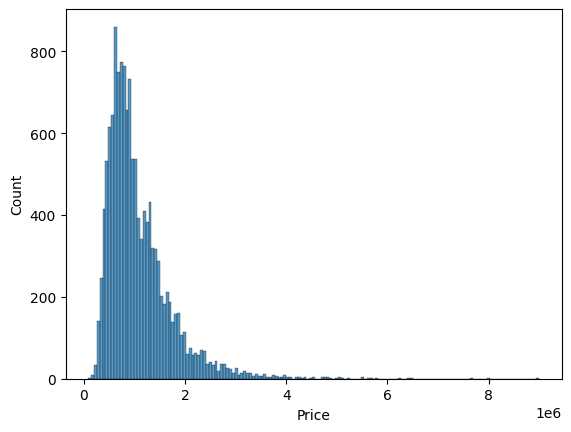

In [53]:
import seaborn as sns
sns.histplot(df["Price"])
max(df["Price"])

<Axes: xlabel='Regionname'>

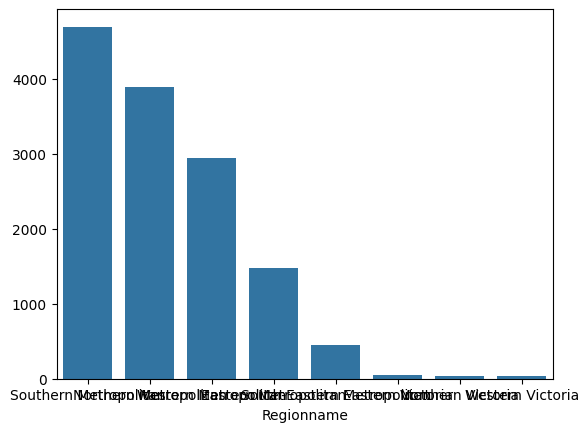

In [54]:
sns.barplot(x= df["Regionname"].value_counts().index, y=df["Regionname"].value_counts().values)

In [55]:
print("shape:\n", df.shape)
print("\ndatatypes:\n",df.dtypes)
print("\nstatistics: \n",df.describe())
print("\nnull values: \n",df.isnull().sum())

shape:
 (13580, 22)

datatypes:
 Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
Yard              object
dtype: object

statistics: 
               Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000

## Remove missing values

dropna() takes various parameters like —
* axis — We can specify axis=0 if we want to remove the rows and axis=1 if we want to remove the columns.
* how — If we specify how = ‘all’ then the rows and columns will only be dropped if all the values are NaN.By default how is set to ‘any’.
* thresh — It determines the threshold value so if we specify thresh=5 then the rows having less than 5 real values will be dropped.
* subset —If we have 4 columns A, B, C and D then if we specify subset=[‘C’] then only the rows that have their C value as NaN will be removed.
* inplace — By default, no changes will be made to your dataframe. So if you want these changes to reflect onto your dataframe then you need to use inplace = True.

In [56]:
print ("number of entries wit at least 1 NA: ", sum(df.isnull().any(axis=1)))
df.dropna().shape

number of entries wit at least 1 NA:  7384


(6196, 22)

## Standardization
In Standardization, we transform our values such that the mean of the values is 0 and the standard deviation is 1.
The important thing to note here is that we need to standardize both training and testing data.\
Skleanr Standardsacale implemnts a simple Scaler for us.

`fit()` calculates the mean and standard deviation and the `transform()` function actually standardizes the dataset.\
We can do this process in a single line of code using the `fit_transform()` function.\



In [57]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df[['Rooms_standardized','Price_standardized']] = std.fit_transform(df[['Rooms','Price']])
df[['Rooms_standardized','Price_standardized']]


,Rooms_standardized,Price_standardized
0,-0.981463,0.632448
1,-0.981463,-0.063640
2,0.064876,0.608984
3,0.064876,-0.353025
4,1.111216,0.820157
...,...,...
13575,1.111216,0.264851
13576,0.064876,-0.069897
13577,0.064876,0.147533
13578,1.111216,2.227975


## Questions:
* Does it make sense to standardize Postcode, Longitude, Propertycount, Distance?
* How can you interpret the fact that a hosue has a standardized prize of `-1.0`?

## Handling categorical variables

We need to preprocess ordinal and nominal categorical variables differently to make them interpretable for many machine learning algorithms. Here are some techniques one can use to encode Categorical values, such as:

* Replacing values
* Encoding labels
* One-Hot encoding
* Binary encoding

Typecasting categrical variables to "category" is generally recommended for performance. for easy label encoding it is even necessary:

In [58]:
df["Suburb_encoded"]=df["Suburb"].astype("category").cat.codes
df[["Suburb","Suburb_encoded"]].astype("category")

,Suburb,Suburb_encoded
0,Abbotsford,0
1,Abbotsford,0
2,Abbotsford,0
3,Abbotsford,0
4,Abbotsford,0
...,...,...
13575,Wheelers Hill,302
13576,Williamstown,305
13577,Williamstown,305
13578,Williamstown,305


A different startegy to deal with categorical data is called "One-Hot Encoding":

In [59]:
# from sklearn.preprocessing import LabelBinarizer

df1 = pd.get_dummies(df,prefix=['Regionname'], columns = ['Regionname'], drop_first=True)
df1.sample(n=10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Rooms_standardized,Price_standardized,Suburb_encoded,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2885,Glenroy,4 Lyons St,3,h,600000.0,S,Barry,8/10/2016,13.0,3046.0,...,0.064876,-0.744085,138,False,True,False,False,False,False,False
256,Armadale,10/581 Orrong Rd,1,u,440000.0,SP,Jellis,18/03/2017,6.3,3143.0,...,-2.027803,-0.994364,11,False,False,False,False,True,False,False
8683,Toorak,1/48 Mathoura Rd,2,u,650000.0,S,Hodges,13/05/2017,4.6,3142.0,...,-0.981463,-0.665873,283,False,False,False,False,True,False,False
3038,Hampton,22 Margarita St,4,h,2880000.0,S,Marshall,10/09/2016,13.7,3188.0,...,1.111216,2.822387,144,False,False,False,False,True,False,False
4413,Northcote,12/20 Ross St,1,u,435000.0,S,Nelson,10/09/2016,5.5,3070.0,...,-2.027803,-1.002185,217,False,True,False,False,False,False,False
1881,Clifton Hill,66 Noone St,2,h,780000.0,S,Harrington,4/06/2016,3.4,3068.0,...,-0.981463,-0.462522,79,False,True,False,False,False,False,False
1730,Carnegie,4 Vine Gr,4,h,1830000.0,S,Gary,10/09/2016,11.4,3163.0,...,1.111216,1.179933,63,False,False,False,False,True,False,False
4192,Moorabbin,77 Chapel Rd,3,h,920000.0,S,hockingstuart,28/05/2016,14.6,3189.0,...,0.064876,-0.243528,203,False,False,False,False,True,False,False
2315,Elwood,288 Barkly St,3,h,1561000.0,S,McGrath,25/02/2017,7.7,3184.0,...,0.064876,0.759152,114,False,False,False,False,True,False,False
6418,Viewbank,24 Martins La,3,h,820000.0,S,Nelson,6/08/2016,13.8,3084.0,...,0.064876,-0.399952,290,False,False,False,False,False,False,False


## Exercise

Pick one Variable in the Dataset above (e.g Price) and try to draw some conclusion about the data (e.g. how are prices distributed across the dataset, what is the highest/lowest price, how different are prices across regions, etc.)
If you have time, try to visualize this finding in a graph.

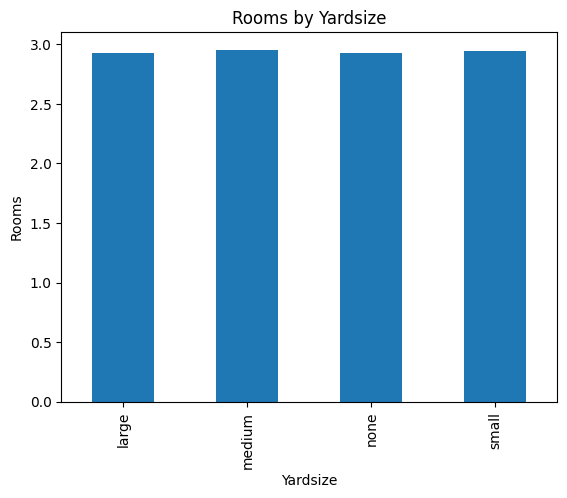

In [62]:
import matplotlib.pyplot as plt


rooms_by_yard = df.groupby("Yard")["Rooms"].mean()

rooms_by_yard.plot(kind="bar")
plt.xlabel('Yardsize')
plt.ylabel('Rooms')
plt.title('Rooms by Yardsize')
plt.show()

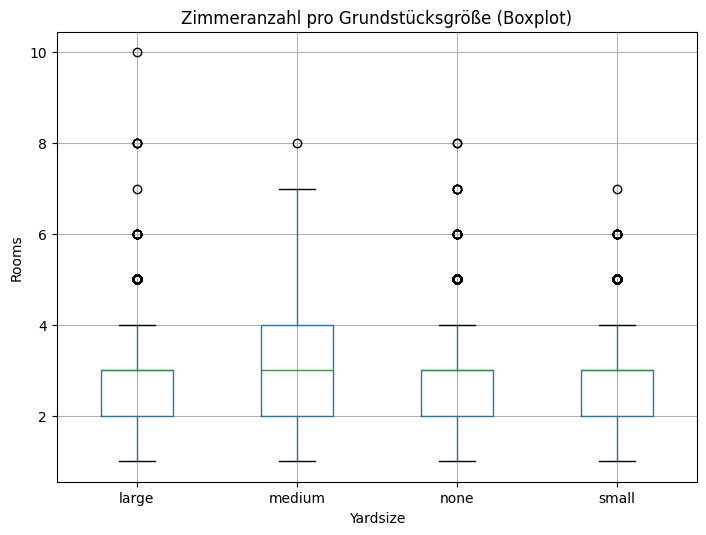

In [69]:
df.boxplot(column="Rooms", by="Yard", figsize=(8,6))
plt.title('Number of rooms by Yard size')
plt.suptitle("")
plt.xlabel('Yardsize')
plt.ylabel('Rooms')
plt.show()
